# Homework 3
Due: Thurs 2/29/24 at 6 pm CT \
Submit as .ipynb file

# Scoring
- (1) = 50 points
    - (a): 10 points
    - (b): 20 points
    - (c): 10 points
    - (d): 10 points
- (2) = 50 points
    - (a): 10 points
    - (b): 4 points
    - (c): 5 points
    - (d): 10 points
    - (e): 10 points
    - (f): 6 points
    - (g): 5 points

# (1) Consider this paper:
Machine Learning Directed Search for Ultraincompressible, Superhard Materials \
Aria Mansouri Tehrani, Anton O. Oliynyk, Marcus Parry, Zeshan Rizvi, Samantha Couper, Feng Lin, Lowell Miyagi, Taylor D. Sparks, and Jakoah Brgoch*

J. Am. Chem. Soc. 2018, 140, 31, 9844–9853

![](../../modules/files/brgoch_hardness_toc.png)

## (a) Understanding what they did
**Guidelines**:
- answer each of the following in 1-3 sentences
### (1) What was the objective of this paper?
### (2) Was this supervised or unsupervised learning?
### (3) Was this regression or classification?
### (4) Explain how a "kernel" is used in a support vector machine.
### (5) Describe their approach to validating their machine learning model.

**Scoring**:
- +1 point for attempting each
- +1 point for suitable answer to each

# Answer (1a) here
1. The authors of the paper wanted to predict the elastic moduli of materials using SVM, and the results of this discovery could accelerate the discovery of "next-generation, functional inorganic materials".
2. The paper utilizes SVMs, which are a set of supervised learning methods.
3. Under "Data Extraction and Machine-Learning Training Model", they specify that their moidel was created based on a "Support Vector Machine Regression". Therefore, this was a regression.
4. Kernels are a way of mapping an originally non-linear set of data points to a system where the data is able to be represented linearly.
5. They validated their model by employing 10-fold cross-validation. (after 20-fold cross-validation used for variable selection)

## Exploring their data

### Load their data using matminer

In [1]:
from matminer.datasets import load_dataset
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

df = load_dataset('brgoch_superhard_training')
df.head()

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False


### Convert their feature dicts to columns

In [2]:
brgoch_feat_dicts = df['brgoch_feats'].values
brgoch_feat_names = sorted(list(brgoch_feat_dicts[0].keys()))

for feature in brgoch_feat_names:
    df[feature] = [feat_dict[feature] for feat_dict in brgoch_feat_dicts]

In [3]:
df.head()

,formula,bulk_modulus,shear_modulus,composition,material_id,structure,brgoch_feats,suspect_value,Allred-Rochow_EN_feat_1,Allred-Rochow_EN_feat_2,...,specific_heat_feat_1,specific_heat_feat_2,specific_heat_feat_3,specific_heat_feat_4,thermal_conductivity_feat_1,thermal_conductivity_feat_2,thermal_conductivity_feat_3,thermal_conductivity_feat_4,valence_electron_density,volume_per_atom
0,AlPt3,225.230461,91.197748,"(Al, Pt)",mp-188,"[[0. 0. 0.] Al, [0. 1.96140395 1.96140...","{'atomic_number_feat_1': 123.5, 'atomic_number...",False,3.3865,3.547,...,0.645,0.51,0.13,0.90,225.90000,22.20000,71.60000,237.0,0.899196,14.457360
1,Mn2Nb,232.696340,74.590157,"(Mn, Nb)",mp-12659,[[-2.23765223e-08 1.42974191e+00 5.92614104e...,"{'atomic_number_feat_1': 45.5, 'atomic_number_...",False,2.4550,2.090,...,0.610,0.70,0.26,0.48,34.67000,38.06000,7.82000,53.7,0.947211,12.668777
2,HfO2,204.573433,98.564374,"(Hf, O)",mp-352,"[[2.24450185 3.85793022 4.83390736] O, [2.7788...","{'atomic_number_feat_1': 44.0, 'atomic_number_...",False,4.1900,6.060,...,0.990,1.70,0.14,0.92,11.52674,22.94652,0.02674,23.0,0.850563,11.756914
3,Cu3Pt,159.312640,51.778816,"(Cu, Pt)",mp-12086,"[[0. 1.86144248 1.86144248] Cu, [1.861...","{'atomic_number_feat_1': 82.5, 'atomic_number_...",False,3.6350,3.830,...,0.635,1.01,0.13,0.38,637.30000,1131.40000,71.60000,401.0,1.740288,12.066970
4,Mg3Pt,69.637565,27.588765,"(Mg, Pt)",mp-18707,"[[0. 0. 2.73626461] Mg, [0. ...","{'atomic_number_feat_1': 57.0, 'atomic_number_...",False,2.7995,2.159,...,1.595,2.93,0.13,1.02,269.80000,396.40000,71.60000,156.0,0.638524,18.793352


In [4]:
df.describe()

,bulk_modulus,shear_modulus,Allred-Rochow_EN_feat_1,Allred-Rochow_EN_feat_2,Allred-Rochow_EN_feat_3,Allred-Rochow_EN_feat_4,Gillman_number_VE_feat_1,Gillman_number_VE_feat_2,Gillman_number_VE_feat_3,Gillman_number_VE_feat_4,...,specific_heat_feat_1,specific_heat_feat_2,specific_heat_feat_3,specific_heat_feat_4,thermal_conductivity_feat_1,thermal_conductivity_feat_2,thermal_conductivity_feat_3,thermal_conductivity_feat_4,valence_electron_density,volume_per_atom
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,...,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000
mean,118.792108,59.811241,3.386460,3.564600,1.332096,2.271378,6.357226,7.321678,2.182595,4.634033,...,1.086355,1.417828,0.276815,0.831197,160.801920,236.990894,29.117198,149.896177,0.874320,17.562392
std,71.055862,41.593327,2.371095,4.390938,0.320949,0.669024,4.474709,8.040068,1.037235,1.315585,...,1.771782,3.224834,0.152370,0.705139,238.991066,379.748151,39.690045,107.450922,0.381962,5.879860
min,3.594447,2.457116,1.128000,0.000000,0.659000,1.034000,1.000000,0.000000,1.000000,1.000000,...,0.130000,0.000000,0.120000,0.130000,1.201740,0.000000,0.008900,2.350000,0.103454,5.890000
25%,59.640197,28.239200,1.953125,0.804750,1.120000,1.840000,3.666667,2.000000,1.000000,4.000000,...,0.455000,0.260000,0.140000,0.440000,54.094917,62.590000,0.269000,71.800000,0.621899,13.505831
50%,111.810573,51.575971,2.741000,2.197500,1.340000,1.994000,5.000000,5.000000,2.000000,5.000000,...,0.716667,0.600000,0.240000,0.710000,100.013370,128.200000,17.200000,116.000000,0.842400,16.350172
75%,167.303237,81.755428,4.010375,4.146000,1.590000,2.544000,7.500000,9.000000,3.000000,6.000000,...,1.161333,1.460000,0.330000,0.920000,178.679167,253.843530,35.300000,200.000000,1.070135,20.634837
max,385.194240,383.403010,39.064500,40.584000,2.158000,4.193000,68.000000,69.000000,6.000000,7.000000,...,28.420000,53.488000,1.040000,3.600000,5349.000000,4404.200000,317.000000,429.000000,2.659142,48.844971


### Separate features from targets and non-features

In [5]:
targets = ['bulk_modulus', 'shear_modulus']
non_features = ['formula', 'composition', 'material_id', 'structure', 'brgoch_feats', 'suspect_value']
columns = list(df)
features = [f for f in columns if f not in targets if f not in non_features]

In [6]:
features

['Allred-Rochow_EN_feat_1',
 'Allred-Rochow_EN_feat_2',
 'Allred-Rochow_EN_feat_3',
 'Allred-Rochow_EN_feat_4',
 'Gillman_number_VE_feat_1',
 'Gillman_number_VE_feat_2',
 'Gillman_number_VE_feat_3',
 'Gillman_number_VE_feat_4',
 'Gilman_electron_density',
 'Gordy_EN_feat_1',
 'Gordy_EN_feat_2',
 'Gordy_EN_feat_3',
 'Gordy_EN_feat_4',
 'Laue_class',
 'Martynov_EN_feat_1',
 'Martynov_EN_feat_2',
 'Martynov_EN_feat_3',
 'Martynov_EN_feat_4',
 'Mendeleev_number_feat_1',
 'Mendeleev_number_feat_2',
 'Mendeleev_number_feat_3',
 'Mendeleev_number_feat_4',
 'Mulliken_EN_feat_1',
 'Mulliken_EN_feat_2',
 'Mulliken_EN_feat_3',
 'Mulliken_EN_feat_4',
 'Pauling_EN_feat_1',
 'Pauling_EN_feat_2',
 'Pauling_EN_feat_3',
 'Pauling_EN_feat_4',
 'Zungar_radius_feat_1',
 'Zungar_radius_feat_2',
 'Zungar_radius_feat_3',
 'Zungar_radius_feat_4',
 'anisotropy',
 'atomic_number_feat_1',
 'atomic_number_feat_2',
 'atomic_number_feat_3',
 'atomic_number_feat_4',
 'atomic_radius_feat_1',
 'atomic_radius_feat_2',


## (b) Train a support vector regressor to predict bulk modulus
**Guidelines**:
1. reserve 15% of your data for testing
2. scale your features
3. identify the best regularization parameter (`C`) to use with a polynomial kernel
4. plot the training and validation RMSE as a function of `C`

**Scoring**:
- +2 points for attempting each point in the guidelines
- +3 points for satisfactorily addressing each point

In [7]:
######### Answer 1b (code)
import numpy as np

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVR

test_size = 0.15
C_vec = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]

X_norm = (df[features] - df[features].min()) / (df[features].max() - df[features].min())
y_norm = (df[targets[0]] - df[targets[0]].min()) / (df[targets[0]].max() - df[targets[0]].min())

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size = test_size, random_state = 2024)

RMSE_train_scores = []
RMSE_val_scores = []

for C in C_vec:
    svr = SVR(kernel = "poly", C = C)

    scores = cross_validate(svr, X_train, y_train, scoring = "neg_root_mean_squared_error", cv = 5, return_train_score = True)
    RMSE_train_scores.append(np.mean(abs(scores["train_score"])))
    RMSE_val_scores.append(np.mean(abs(scores["test_score"])))

Text(0, 0.5, 'RMSE')

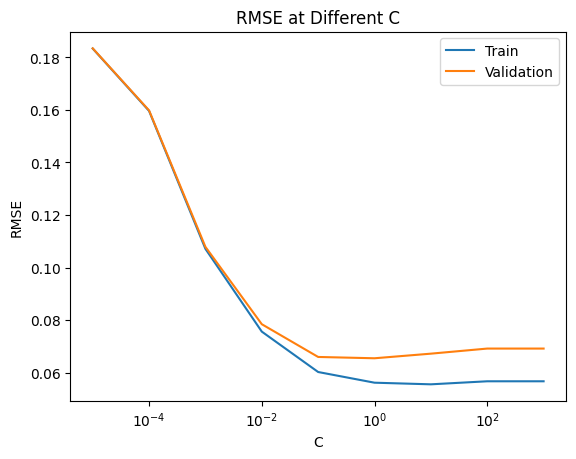

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(C_vec, RMSE_train_scores, label = "Train")
ax.plot(C_vec, RMSE_val_scores, label = "Validation")
ax.set_xscale('log')
ax.legend()
ax.set_title("RMSE at Different C")
ax.set_xlabel("C")
ax.set_ylabel("RMSE")

# Answer 1b (discussion)
- From the plot, we can see that C = 1 has the best validation RMSE.

### (c) Use permutation importances to determine which features are most important for this prediction

**Guidelines**:
- use `sklearn.inspection.permutation_importance`
- use `SVR(kernel='poly', C=32)` as your estimator
- permutation importances should be determined on a validation set
    - you should fit your estimator to a subset of `X_train`, `y_train` and determine importances using a different subset
- use `n_repeats = 2` so that it doesn't take too long
- use `scoring = 'neg_root_mean_squared_error'`
- print the 10 most important features
    - print the feature name along with the importance
- plot a bar chart of the sorted importances
    - the y-axis is the feature importance
    - the x-axis is the index of each feature (index = 0 should correspond with the most important feature)

**Hints**:
- review the [User Guide](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance) for `permutation_importance`

**Scoring**:
- +4 points for attempting
- +3 points for successfully computing permutation importances
- +1 point for using the validation set
- +1 point for printing the 10 features
- +1 point for generating the bar chart

In [9]:
########## Answer 1c
from sklearn.inspection import permutation_importance

X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size = 0.5, random_state = 2024)

svr = SVR(kernel = "poly", C = 32)
svr.fit(X_est, y_est)

res = permutation_importance(svr, X_val, y_val, scoring = "neg_root_mean_squared_error", n_repeats = 2)

In [10]:
feat_imp = dict(zip(features, res["importances_mean"]))
sorted_features = sorted(feat_imp, key = feat_imp.get, reverse = True)
sorted_importances = [feat_imp[f] for f in sorted_features]

for i in range(10):
    print(sorted_features[i], ": ", sorted_importances[i])

space_group_number :  0.026287407715375015
density :  0.024250112740428063
volume_per_atom :  0.020499933798797915
crystal_class :  0.019948632551592585
number_VE_feat_4 :  0.019024959221070725
electron_density :  0.015514904583350968
heat_of_fusion_feat_4 :  0.013441165285175367
number_p_electrons_feat_4 :  0.010406574200317938
Gilman_electron_density :  0.00895689158122543
family_number_feat_3 :  0.008720557115071352


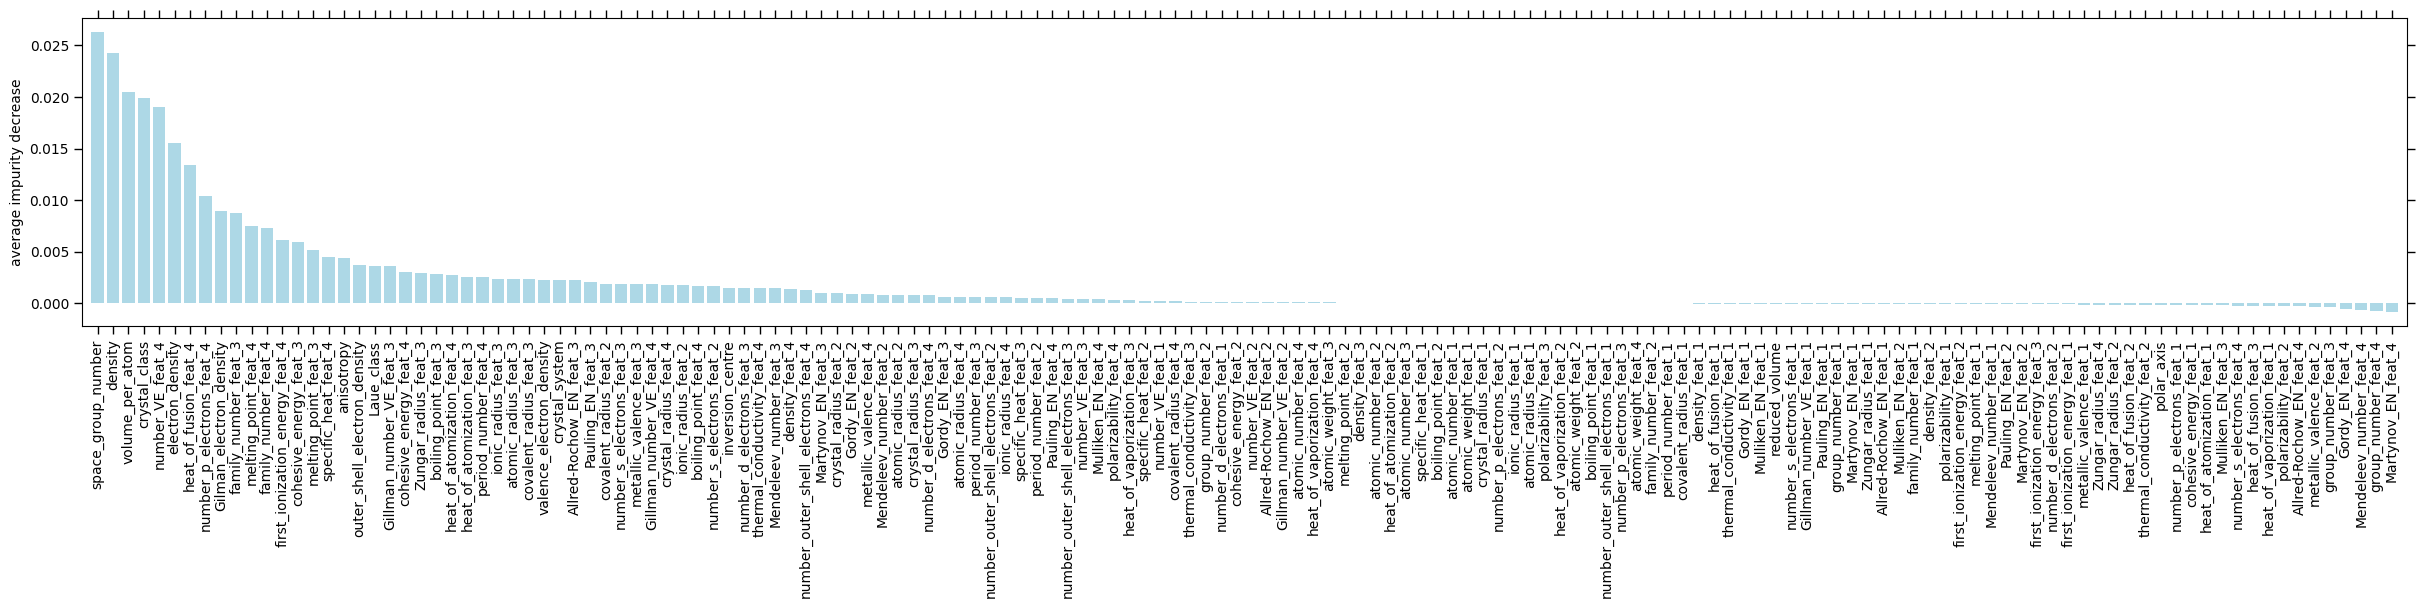

In [11]:
axis_width = 1
maj_tick_len = 6
fontsize = 10
bar_color = 'lightblue'
align = 'center'
label = '__nolegend__'

n_features = len(features)

fig, ax = plt.subplots(figsize = (30, 4))
ax.bar(range(n_features), sorted_importances, color = bar_color, align = align, label = label)
ax.set_xticks(range(n_features), sorted_features, rotation=90)
ax.set_xlim([-1, n_features])
ax.set_ylabel('average impurity decrease', fontsize=fontsize)
ax.tick_params('both', length=maj_tick_len, width=axis_width,
                         which='major', right=True, top=True)

### (d) Consider how feature correlations might influence your results
**Guidelines**:
- compute the pairwise Pearson correlation among three features in your model: `['crystal_radius_feat_1', 'covalent_radius_feat_1', 'ionic_radius_feat_1']`
- for the purposes of this exercise, it's OK to use your full data (ie the whole DataFrame). In practice, you'd want to do this only on the training set
- your printed output should be:
  - PC(feature 1, feature 2) = <the Pearson correlation between feature 1 and feature 2>
  - PC(feature 1, feature 3) = <the Pearson correlation between feature 1 and feature 3>
  - PC(feature 2, feature 3) = <the Pearson correlation between feature 2 and feature 3>
- discuss the implications of these correlations on: 1) training the model and 2) interpreting the feature importances

**Hints**:
- [this link](https://realpython.com/numpy-scipy-pandas-correlation-python/) may help

**Guidelines**:
- +3 points for attempting
- +3 points for printing Pearson correlations
- +2 points for discussing implications for training
- +2 points for appropriately discussing implications for interpretation

In [12]:
######## Answer 1d (code)
from scipy.stats import pearsonr

r12, _ = pearsonr(df["crystal_radius_feat_1"], df["covalent_radius_feat_1"])
r13, _ = pearsonr(df["crystal_radius_feat_1"], df["ionic_radius_feat_1"])
r23, _ = pearsonr(df["covalent_radius_feat_1"], df["ionic_radius_feat_1"])

print("PC(crystal_radius_feat_1, covalent_radius_feat_1) = ", r12)
print("PC(crystal_radius_feat_1, ionic_radius_feat_1) = ", r13)
print("PC(covalent_radius_feat_1, ionic_radius_feat_1) = ", r23)

PC(crystal_radius_feat_1, covalent_radius_feat_1) =  0.8784281217527616
PC(crystal_radius_feat_1, ionic_radius_feat_1) =  0.8596378959298695
PC(covalent_radius_feat_1, ionic_radius_feat_1) =  0.995068902084369


In [13]:
print(feat_imp["crystal_radius_feat_1"])
print(feat_imp["covalent_radius_feat_1"])
print(feat_imp["ionic_radius_feat_1"])

2.722838951019213e-05
-1.0245976874913298e-05
2.3432732675000845e-05


# Answer 1d (discussion)
1. In training the model, additional features that are closely correlated with previous features provide little to no additional meaning to the model (since mathematically this shows linear dependence). So, the last PC implies that we can drop one of the two features from our training set and retrieve similar results while improving computation time and memory use.
2. Features with higher importance tend to be less correlated to other features. We can see that the "most important" feature from this list of three is "crystal_radius_feat_1", and it has the lowest correlations when compared to the other two features.

# (2) Classifying materials as metallic glasses

## Read the following paper:
[A general-purpose machine learning framework for predicting properties of inorganic materials](https://www.nature.com/articles/npjcompumats201628)

Logan Ward et al., npj Computational Materials volume 2, Article number: 16028 (2016)
![](../../modules/files/magpie.png)



## (a) Understanding what they did
**Guidelines**:
- answer each of the following in 3-5 sentences
### (1) How does "partitioning" lead to improved performance in the context of Figure 1?
### (2) The authors use two different forms of validation in the context of glass-forming ability. How do these probe different capabilities of their model?

**Scoring**:
- +2 point for attempting each
- +3 point for suitable answer to each

# Answer 2a
1. In Figure 1, the data was partitioned into groups of similar materials and then trained a separate model on each subset. In essence, their description of partitioning resembles the idea of ensemble methods. They separated the data, trained separate models, used their results to create a conglomerate model.
2. They validate their model with experimental measurements from the Al-Ni-Zr ternary system. The other method of validation was to validate a prediction on the ternary system without feeding the model experimental measurements. This shows the model's ability to either explain or predict new data.

## Load the matbench glass dataset
- This dataset has a few thousand materials that are labeled as to whether they can form metallic glasses (materials with useful mechanical properties)
- "gfa" = glass-forming ability with gfa=True meaning the material does form a metallic glass under certain conditions


In [14]:
df = load_dataset('matbench_glass')

In [15]:
df.head()

,composition,gfa
0,Al,False
1,Al(NiB)2,True
2,Al10Co21B19,True
3,Al10Co23B17,True
4,Al10Co27B13,True


In [16]:
df.describe()

,composition,gfa
count,5680,5680
unique,5680,2
top,Al,True
freq,1,4035


## Map each chemical composition into mole fraction features

In [17]:
from matminer.featurizers.composition.element import ElementFraction
from pymatgen.core.composition import Composition

In [18]:
formulas = df['composition'].values
formulas = [Composition(f) for f in formulas]
feature_labels = ElementFraction().feature_labels()
print(feature_labels)
print('\n\n')
feature_data = {f : dict(zip(feature_labels, ElementFraction().featurize(f))) for f in formulas}
print(feature_data[formulas[0]])

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']



{'H': 0, 'He': 0, 'Li': 0, 'Be': 0, 'B': 0, 'C': 0, 'N': 0, 'O': 0, 'F': 0, 'Ne': 0, 'Na': 0, 'Mg': 0, 'Al': 1.0, 'Si': 0, 'P': 0, 'S': 0, 'Cl': 0, 'Ar': 0, 'K': 0, 'Ca': 0, 'Sc': 0, 'Ti': 0, 'V': 0, 'Cr': 0, 'Mn': 0, 'Fe': 0, 'Co': 0, 'Ni': 0, 'Cu': 0, 'Zn': 0, 'Ga': 0, 'Ge': 0, 'As': 0, 'Se': 0, 'Br': 0, 'Kr': 0, 'Rb': 0, 'Sr': 0, 'Y': 0, 'Zr': 0, 'Nb': 0, 'Mo': 0, 'Tc': 0, 'Ru': 0, 'Rh'

## Next we'll use `feature_data` to populate a dataframe with the molar fraction of each element in each composition

In [19]:
for el in feature_labels:
    df['x_%s' % el] = [feature_data[f][el] for f in formulas]

print('Fraction of Zr in ZrTiSi2 = %.2f' % df['x_Zr'].get((df.composition == 'ZrTiSi2')).values[0])
df.head()

Fraction of Zr in ZrTiSi2 = 0.25


,composition,gfa,x_H,x_He,x_Li,x_Be,x_B,x_C,x_N,x_O,...,x_Pu,x_Am,x_Cm,x_Bk,x_Cf,x_Es,x_Fm,x_Md,x_No,x_Lr
0,Al,False,0,0,0,0.0,0.00,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Al(NiB)2,True,0,0,0,0.0,0.40,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Al10Co21B19,True,0,0,0,0.0,0.38,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Al10Co23B17,True,0,0,0,0.0,0.34,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Al10Co27B13,True,0,0,0,0.0,0.26,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## The remainder will be a multi-step problem with the ultimate goal of developing a predictive model to classify materials as glass formers based on their chemical composition

## (b) Remove irrelevant features
**Guidelines**:
- justify your decision
- print the features you are removing

**Hints**:
- I removed 48 features

**Scoring**:
- +2 points for attempting
- +1 point for removing the right features
- +1 point for justification

In [20]:
######## Answer 2b (code)
target = "gfa"
non_feature = "composition"

columns = list(df)
features = [c for c in columns if c not in target if c not in non_feature]

summed = df[features].sum()
to_remove = []

for feature in features:
    if summed[feature] <= 0:
        to_remove.append(feature)

for feature in to_remove:
    df = df.drop(feature, axis = 1)
    features.remove(feature)

print(f"Removed {len(to_remove)} features: ", to_remove)

Removed 48 features:  ['x_H', 'x_He', 'x_Li', 'x_Ne', 'x_Na', 'x_S', 'x_Cl', 'x_Ar', 'x_K', 'x_As', 'x_Se', 'x_Br', 'x_Kr', 'x_Rb', 'x_Tc', 'x_Cd', 'x_Te', 'x_I', 'x_Xe', 'x_Cs', 'x_Pm', 'x_Eu', 'x_Tm', 'x_Lu', 'x_Re', 'x_Os', 'x_Hg', 'x_Tl', 'x_Bi', 'x_Po', 'x_At', 'x_Rn', 'x_Fr', 'x_Ra', 'x_Ac', 'x_Th', 'x_Pa', 'x_Np', 'x_Pu', 'x_Am', 'x_Cm', 'x_Bk', 'x_Cf', 'x_Es', 'x_Fm', 'x_Md', 'x_No', 'x_Lr']


# Answer 2b (discussion)
- Columns that have sum 0 mean that the mole fractions just do not exist between the data points. So, removing these would make sense, since they play no part in any meaningful analysis.

## (c) Set up the classification problem
**Guidelines**:
- Generate a feature matrix and target array for a training and test set
- print the length of your training and test sets
- explain any decisions (e.g., the train/test ratio)

**Scoring**:
- +2 points for attempting
- +1 points for generating the matrices
- +1 point for print statement
- +1 point for explanation

In [21]:
########## Answer 2c (code)
from sklearn.model_selection import train_test_split

test_size = 0.15

X, y = df[features].values, df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 2024)

print("# Data in Training set: ", X_train.shape[0])
print("# Data in Test set: ", X_test.shape[0])

# Data in Training set:  4828
# Data in Test set:  852


# Answer 2c (discussion)
- We should save a substantial amount of our original data set for testing, and since a 15% ratio provides ~800 data points while providing ~4,800 for training, this should be sufficient for our purposes.

# (d) Use CV to estimate the generalization performance of a k-nearest neighbors classifer, a support vector classifier, and a decision tree
**Guidelines**:
- lightly tune at least one hyperparameter (maybe try at least three values) in your support vector classifier and your decision tree
- use F1 score as the metric to decide which model is best
- justify your hyperparameter selection
- use stratified cross validation

**Scoring**:
- +3 points for attempting
- +1 point for using F1
- +2 point for appropriate hyperparameter tuning
- +2 point for justification
- +2 point for using stratified CV


In [22]:
######### Answer 2d (code)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

scoring_method = f1_score

C_vec = [1e-2, 1e-1, 1, 1e1, 1e2]
alpha_vec = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

F1_svc = []
F1_dt = []

skf = StratifiedKFold(shuffle = True, random_state = 2024)

knc = KNeighborsClassifier(n_neighbors = 2) # 2 classes

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    knc.fit(X_train[train_index], y_train[train_index])
    y_pred = knc.predict(X_train[test_index])

    f1 = scoring_method(y_train[test_index], y_pred)
    print(f"KNC: At fold {i}, F1 = {f1}")

y_pred = knc.predict(X_test)
F1_knc = scoring_method(y_test, y_pred)

for C in C_vec:
    svc = SVC(C = C)

    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        svc.fit(X_train[train_index], y_train[train_index])
        y_pred = svc.predict(X_train[test_index])

        f1 = scoring_method(y_train[test_index], y_pred)
        print(f"SVC @ C = {C}: At fold {i}, F1 = {f1}")

    y_pred = svc.predict(X_test)

    f1 = scoring_method(y_test, y_pred)
    F1_svc.append(f1)

for alpha in alpha_vec:
    dt = DecisionTreeClassifier(ccp_alpha = alpha)

    for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
        dt.fit(X_train[train_index], y_train[train_index])
        y_pred = dt.predict(X_train[test_index])

        f1 = scoring_method(y_train[test_index], y_pred)
        print(f"DT @ alpha = {alpha}: At fold {i}, F1 = {f1}")

    y_pred = dt.predict(X_test)

    f1 = scoring_method(y_test, y_pred)
    F1_dt.append(f1)

best_C = C_vec[np.argmax(F1_svc)]
best_alpha = alpha_vec[np.argmax(F1_dt)]

print("F1 validation score for KNC: ", F1_knc)
print(f"Best F1 validation score for SVC @ : C = {best_C}, F1 = {max(F1_svc)}")
print(f"Best F1 validation score for DT @ : alpha = {best_alpha}, F1 = {max(F1_dt)}")

KNC: At fold 0, F1 = 0.8719101123595505
KNC: At fold 1, F1 = 0.8701700154559504
KNC: At fold 2, F1 = 0.8696319018404909
KNC: At fold 3, F1 = 0.8440651667959659
KNC: At fold 4, F1 = 0.8702993092862624
SVC @ C = 0.01: At fold 0, F1 = 0.8312159709618875
SVC @ C = 0.01: At fold 1, F1 = 0.8319226118500604
SVC @ C = 0.01: At fold 2, F1 = 0.8319226118500604
SVC @ C = 0.01: At fold 3, F1 = 0.8317191283292978
SVC @ C = 0.01: At fold 4, F1 = 0.8317191283292978
SVC @ C = 0.1: At fold 0, F1 = 0.8381538461538462
SVC @ C = 0.1: At fold 1, F1 = 0.843980343980344
SVC @ C = 0.1: At fold 2, F1 = 0.8332315210751375
SVC @ C = 0.1: At fold 3, F1 = 0.8393977415307404
SVC @ C = 0.1: At fold 4, F1 = 0.8345498783454989
SVC @ C = 1: At fold 0, F1 = 0.8608282416836388
SVC @ C = 1: At fold 1, F1 = 0.8692676249144421
SVC @ C = 1: At fold 2, F1 = 0.8690958164642375
SVC @ C = 1: At fold 3, F1 = 0.8524590163934426
SVC @ C = 1: At fold 4, F1 = 0.8612051455653351
SVC @ C = 10.0: At fold 0, F1 = 0.8921363952679193
SVC @

# Answer 2d (discussion)
- I decided to change C in the SVC and ccp_alpha in the DT. I chose values that were reasonable for their respective models, and chose C and alpha whose models performed the best respectively. For SVC, this was C = 100, and for DT, this was when alpha = 1e-7.

## (e) compute the validation F1 score for an ensemble of the three models with the best hyperparameters you identified
**Guidelines**:
- use a majority vote approach to ensembling
- how does this performance compare to your three individual models. Explain what you observe
- is this model better than a naive model that would require no training. Why or why not?

**Scoring**:
- +3 points for attempting
- +5 points for successful implementation
- +2 points for explanation

In [23]:
######### Answer 2e (code)
knc = KNeighborsClassifier(n_neighbors = 2)
svc = SVC(C = best_C)
dt = DecisionTreeClassifier(ccp_alpha = best_alpha)

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    knc.fit(X_train[train_index], y_train[train_index])
    svc.fit(X_train[train_index], y_train[train_index])
    dt.fit(X_train[train_index], y_train[train_index])

    y_knc = knc.predict(X_train[test_index])
    y_svc = svc.predict(X_train[test_index])
    y_dt = dt.predict(X_train[test_index])

    y_pred = [round((x * 1 + y * 1 + z * 1) / 3) for x, y, z in zip(y_knc, y_svc, y_dt)]

    f1 = scoring_method(y_train[test_index], y_pred)
    print(f"Ensemble: At fold {i}, F1 = {f1}")

y_knc = knc.predict(X_test)
y_svc = svc.predict(X_test)
y_dt = dt.predict(X_test)

y_pred = [round((x * 1 + y * 1 + z * 1) / 3) for x, y, z in zip(y_knc, y_svc, y_dt)]

F1_ensemble = scoring_method(y_test, y_pred)
print("F1 Score for Ensemble: ", F1_ensemble)

Ensemble: At fold 0, F1 = 0.9149392423159399
Ensemble: At fold 1, F1 = 0.9097578870139398
Ensemble: At fold 2, F1 = 0.912761355443403
Ensemble: At fold 3, F1 = 0.8851251840942562
Ensemble: At fold 4, F1 = 0.9123823316437365
F1 Score for Ensemble:  0.9124579124579124


# Answer 2e (discussion)
- The ensemble method performs slightly better than each of the individual model as seen in 2d. A naive model is probably not preferred in this scenario due to the high dimensionality in our data set.

## (f) Train a Random Forest of 100 decision trees on the same problem
**Guidelines**:
- compare the training/validation performance to your majority vote classifier
- explain some similarities and differences between the approach in (e) and the approach here

**Scoring**:
- +3 points for attempting
- +1 point for comparing performance
- +2 points for explanation

In [24]:
####### Answer 2f (code)
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

for i, (train_index, test_index) in enumerate(skf.split(X_train, y_train)):
    rfc.fit(X_train[train_index], y_train[train_index])

    y_pred = rfc.predict(X_train[test_index])

    f1 = scoring_method(y_train[test_index], y_pred)
    print(f"Random Forest: At fold {i}, F1 = {f1}")

y_pred = rfc.predict(X_test)

F1_rfc = scoring_method(y_test, y_pred)
print("F1 Score for Random Forest: ", F1_rfc)

Random Forest: At fold 0, F1 = 0.9304286718200984
Random Forest: At fold 1, F1 = 0.9208838203848896
Random Forest: At fold 2, F1 = 0.9213323883770377
Random Forest: At fold 3, F1 = 0.9062049062049061
Random Forest: At fold 4, F1 = 0.920114122681883
F1 Score for Random Forest:  0.9250814332247557


# Answer 2f (discussion)
- The random forest performs slightly better compared to our majority vote classifier in 2e in both training validation and testing. A similarity between these two models are that they are both ensemble methods, taking a weighted vote for each sub-model. However, a major difference besides the number of models (3 vs 100) is that the random forest uses 100 different decision trees where the majority vote of 3 different model archetypes were used in 2e.

## (g) using feature importances, print the 5 most important features for your random forest
**Guidelines**:
- you can re-fit to the training set
- you can use `permutation_importances` or the default importances built into `RandomForestClassifier`

**Scoring**:
- +2 points for attempting
- +3 points for implementing

In [25]:
###### Answer 2g
from sklearn.inspection import permutation_importance

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

res = permutation_importance(rfc, X_test, y_test, scoring = "f1", n_repeats = 2)
feat_imp = dict(zip(features, res["importances_mean"]))
sorted_features = sorted(feat_imp, key = feat_imp.get, reverse = True)
sorted_importances = [feat_imp[f] for f in sorted_features]

for i in range(5):
    print(sorted_features[i], ": ", sorted_importances[i])

x_Al :  0.07549332505924539
x_Cu :  0.04378574482365594
x_Ni :  0.04000927113102998
x_Zr :  0.03892718088457048
x_B :  0.03015361437954972
